# **ĐỒ ÁN CUỐI KỲ MÔN MÁY HỌC**

---
**LỚP: CS114.K21.KHTN**

---
> Sinh viên: Trần Đình Khang

> MSSV: 18520896
---

# **1. MÔ TẢ BÀI TOÁN**

> Bài toán: **PHẬN LOẠI 5 LOẠI NƯỚC GIẢI KHÁT ĐƯỢC YÊU THÍCH Ở VIỆT NAM**

> Giới thiệu bài toán:
Bài toán sẽ phân loại 5 loại nước giải khát sau:

*   Pepsi
*   Cocacola
*   Twister
*   Redbull
*   Teaplus

> Input và Output bài toán:

*   INPUT: Một ảnh chụp ở tỉ lệ 9:16 có chứa chai hoặc lon nước giải khát
*   OUTPUT: Tên loại nước giải khát trong 5 loại trên

> Mục đích:

*   Đếm số lượng sản phẩm
*   Phân loại sản phẩm
*   Phân tích hiệu quả makerting của mình và của đối thủ



# **2. MÔ TẢ BỘ DỮ LIỆU**

## Dữ liệu xây dựng mô hình(traning set và validation test)

  

> Dữ liệu dùng để xây dựng model được thu thập bằng cách cắt frame từ video quay thực tế.

> Video được quay với tỉ lệ khung hình 9:16, chất lượng full HD, 30 fps. Mỗi video dài khoảng 20s với 5 class, sau khi cắt frame ta thu được 600 ảnh cho mỗi class, tổng cộng có 3000 ảnh.

> Được chia theo tỉ lệ 80% training và 20% validation

> Dữ liệu được lưu tại đây: [Link dữ liệu training](https://drive.google.com/open?id=1XaCsbib3GD9W7oAVJAGWx2grKo3DDW0m&authuser=18520896%40gm.uit.edu.vn&usp=drive_fs)







## Dữ liệu dùng để đánh giá mô hình (test set)

> Nguồn dữ liệu này được thi thập bằng cách crawl dữ liệu từ internet, cụ thể là bing image search bằng 1 một cụ có tên google_download_image đươc chia sẻ trên github.

> Dữ liệu sau khi thi thập sẽ được xử lí bằng tay, loại bỏ đi cắt dữ liệu rác, cắt ảnh về tỉ lệ 9:16.

> Mỗi class sẽ có 60 ảnh, tổng là 300 ảnh.

> Dữ liệu được lưu tại đây: [Link dữ liệu test](https://drive.google.com/open?id=19wn0Ba5jKScP6KnwKSj18RVkA9n8aPn9&authuser=18520896%40gm.uit.edu.vn&usp=drive_fs)


## Quá trình xử lí dữ liệu

> Các tập dữ liệu thu thập, phân loại và xử lí bằng tay nên khá chuẩn, do đó trong quá trình tiền xử lí sẽ được thực hiện kết hợp trong phần rút trích đặc trưng

> Quá trình tiền xử lí dữ liệu sẽ thực hiện load ảnh từ đường dẫn thư mục, resize về 36x64 pixel (hệ số này để đảm bảo tỉ lệ ratio 9:16), đưa vào biến ma trận numpy và gán nhãn tương ứng. 

> Ở phần này sẽ thực hiện Mount Drive, tải lên các đường dẫn dữ liệu và Import các thư viện cần thiết.





### Mount Drive

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
cd /drive/My Drive/Colab Notebooks/Final_CapStone_Project

/drive/My Drive/Colab Notebooks/Final_CapStone_Project


### Import Library

In [9]:
# import the necessary packages
import cv2
import numpy as np
from imutils import paths

# library to extract feature
from simple_dataset_loader import SimpleDatasetLoader
from simple_preprocessor import SimplePreprocessor
from hog import HOG
from lbps import LocalBinaryPatterns
from sklearn.preprocessing import LabelEncoder

# Library to save data
import h5py

### Tải lên các đường dẫn dữ liệu

In [4]:
# Training Path
PATH_DATA = './dataset'
imagePaths = list(paths.list_images(PATH_DATA))

# Test Path
TEST_DATA = './dataset_test'
imagePaths_test = list(paths.list_images(TEST_DATA))

# **3. MÔ TẢ VỀ CÁC ĐẶC TRƯNG**



> Quá trình rút trích đặt trung sẽ thực hiện tải ảnh lên, thực hiện các bước xử lí rồi lưu kết quả vào file định dạng .h5


> Đồ án sẽ thực hiện các phương pháp rút trích đặc trưng riêng biệt rồi so sánh kết quả giữa các phương pháp:


*   Pixel Is Feature: Đây là phương pháp đơn giản nhất, mỗi pixel của ảnh là một đặc trưng
*   Histogram Of Oriented Gradients
*   Local Binary Patterns







## Pixel Is Feature

### Training Set

In [5]:
sp = SimplePreprocessor(36, 64)
sdl = SimpleDatasetLoader(preprocessors=[sp])

(data_train, labels) = sdl.load(imagePaths, verbose=300)
data_train = data_train.reshape((data_train.shape[0], 6912))

print("[INFO] features matrix: {:.1f}MB".format(
  data_train.nbytes / (1024 * 1000.0)))

# encode the labels as integers
le = LabelEncoder()
labels_original = le.fit_transform(labels)

[INFO] processed 300/3000
[INFO] processed 600/3000
[INFO] processed 900/3000
[INFO] processed 1200/3000
[INFO] processed 1500/3000
[INFO] processed 1800/3000
[INFO] processed 2100/3000
[INFO] processed 2400/3000
[INFO] processed 2700/3000
[INFO] processed 3000/3000
[INFO] features matrix: 20.2MB


### Test Set

In [6]:
sp = SimplePreprocessor(36, 64)
sdl = SimpleDatasetLoader(preprocessors=[sp])

(data_test, labels_test) = sdl.load(imagePaths_test, verbose=300)
data_test = data_test.reshape((data_test.shape[0], 6912))

print("[INFO] features matrix: {:.1f}MB".format(
  data_test.nbytes / (1024 * 1000.0)))

# encode the labels as integers
le = LabelEncoder()
labels_test_original = le.fit_transform(labels_test)

[INFO] processed 300/300
[INFO] features matrix: 2.0MB


## Histogram

### Training Set

In [7]:
# initialize histograms
hg = HOG(12)
sdl = SimpleDatasetLoader(preprocessors=[sp,hg])
# load dataset from memory
(data_hog, labels) = sdl.load(imagePaths,verbose=300)
data_hog = data_hog.astype("float")

[INFO] processed 300/3000
[INFO] processed 600/3000
[INFO] processed 900/3000
[INFO] processed 1200/3000
[INFO] processed 1500/3000
[INFO] processed 1800/3000
[INFO] processed 2100/3000
[INFO] processed 2400/3000
[INFO] processed 2700/3000
[INFO] processed 3000/3000


### Test Set

In [8]:
# initialize histograms
hg = HOG(12)
sdl = SimpleDatasetLoader(preprocessors=[sp,hg])
# load dataset from memory
(data_hog_test, labels_test) = sdl.load(imagePaths_test,verbose=300)
data_hog_test = data_hog_test.astype("float")

[INFO] processed 300/300


## Local Binary Patterns

### Trainning Set

In [9]:
# initialize local binary patterns
lbps = LocalBinaryPatterns(24,8)
sdl = SimpleDatasetLoader(preprocessors=[sp,lbps])
# load dataset from memory
(data_lbps, labels) = sdl.load(imagePaths,verbose=300)
data_lbps = data_lbps.astype("float")

[INFO] processed 300/3000
[INFO] processed 600/3000
[INFO] processed 900/3000
[INFO] processed 1200/3000
[INFO] processed 1500/3000
[INFO] processed 1800/3000
[INFO] processed 2100/3000
[INFO] processed 2400/3000
[INFO] processed 2700/3000
[INFO] processed 3000/3000


### Test Set

In [10]:
# initialize local binary patterns
lbps = LocalBinaryPatterns(24,8)
sdl = SimpleDatasetLoader(preprocessors=[sp,lbps])
# load dataset from memory
(data_lbps_test, labels_test) = sdl.load(imagePaths_test,verbose=300)
data_lbps_test = data_lbps_test.astype("float")

[INFO] processed 300/300


## Lưu dữ liệu đã rút trích đặt trưng vào file .h5

In [21]:
# Train Label
h5f_label = h5py.File('h5_file/labels_train.h5', 'w')
h5f_label.create_dataset('dataset', data=np.array(labels_original))
h5f_label.close()

# Test Label
h5f_label = h5py.File('h5_file/labels_test.h5', 'w')
h5f_label.create_dataset('dataset', data=np.array(labels_test_original))
h5f_label.close()

In [22]:
# PIF Train
h5f_data = h5py.File('h5_file/data_normal.h5', 'w')
h5f_data.create_dataset('dataset', data=np.array(data_train))
h5f_data.close()

# PIF Test
h5f_data = h5py.File('h5_file/data_normal_test.h5', 'w')
h5f_data.create_dataset('dataset', data=np.array(data_test))
h5f_data.close()

In [23]:
# HOG Train
h5f_data = h5py.File('h5_file/data_train_hog.h5', 'w')
h5f_data.create_dataset('dataset', data=np.array(data_hog))
h5f_data.close()

# HOG Test
h5f_data = h5py.File('h5_file/data_test_hog.h5', 'w')
h5f_data.create_dataset('dataset', data=np.array(data_hog_test))
h5f_data.close()

In [24]:
# LPBS Train
h5f_data = h5py.File('h5_file/data_train_lbps.h5', 'w')
h5f_data.create_dataset('dataset', data=np.array(data_lbps))
h5f_data.close()

# LBPS Test
h5f_data = h5py.File('h5_file/data_test_lbps.h5', 'w')
h5f_data.create_dataset('dataset', data=np.array(data_lbps_test))
h5f_data.close()

# **4. MÔ TẢ THUẬT TOÁN MÁY HỌC**

Phần này sẽ bao gồm
> Import các thư viện cần thiết

> Tải lên các tập dữ liệu .h5 đã rút trích đặc trưng trước đó

> Phân chia dữ liệu traning và validation

> Sử dụng 5 model là:

1.   KNeighborsClassifier
2.   LogisticRegression
3.   SVM model
4.   DecisionTreeClassifier
5.   RandomForestClassifier

> 3 phương pháp rút trích đặc trưng

> Sẽ có tất cả 15 model, thực hiện đánh giá kết quả của các model trên tập validation

> Lưu lại các model vào file










## Import các thư viện cần thiết

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# The measure of classification problem
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Lấy dữ liệu đã được rút trích đặt trưng từ file .h5 trước đó để training model

In [36]:
# Label Train
db = h5py.File('h5_file/labels_train.h5', 'r')
label_train = db['dataset'][:,]
db.close()

In [37]:
# PIF Train
db = h5py.File('h5_file/data_normal.h5', 'r')
data_train_pif = db['dataset'][:, 0:]
db.close()

In [38]:
# HOG Train
db = h5py.File('h5_file/data_train_hog.h5', 'r')
data_train_hog = db['dataset'][:, 0:]
db.close()

In [39]:
# LPBS Train
db = h5py.File('h5_file/data_train_lbps.h5', 'r')
data_train_lpbs = db['dataset'][:, 0:]
db.close()


Tải lên dữ liệu test để đánh giá model

In [40]:
# Label Test
db = h5py.File('h5_file/labels_test.h5', 'r')
label_test = db['dataset'][:,]
db.close()

# PIF Test
db = h5py.File('h5_file/data_normal_test.h5', 'r')
testX_pif = db['dataset'][:, 0:]
db.close()

# HOG Test
db = h5py.File('h5_file/data_test_hog.h5', 'r')
testX_hog = db['dataset'][:, 0:]
db.close()

# LPBS Test
db = h5py.File('h5_file/data_test_lbps.h5', 'r')
testX_lpbs = db['dataset'][:, 0:]
db.close()

## Phân chia dữ liệu traning và validation theo lỉ lệ 80% và 20% cho các tập dữ liệu

In [41]:
TEST_SIZE = 0.2
(trainX_pif, validationX_pif, trainY_pif, validationY_pif) = train_test_split(data_train_pif, label_train, test_size=TEST_SIZE, random_state=42)
(trainX_hog, validationX_hog, trainY_hog, validationY_hog) = train_test_split(data_train_hog, label_train, test_size=TEST_SIZE, random_state=42)
(trainX_lpbs, validationX_lpbs, trainY_lpbs, validationY_lpbs) = train_test_split(data_train_lpbs, label_train, test_size=TEST_SIZE, random_state=42)

## Training Model

### Định nghĩa các model

In [36]:
# kNN_model
kNN_model_pif = KNeighborsClassifier(n_neighbors=2)
kNN_model_hog = KNeighborsClassifier(n_neighbors=2)
kNN_model_lpbs = KNeighborsClassifier(n_neighbors=2)

# logistic_model
logistic_model_pif = LogisticRegression()
logistic_model_hog = LogisticRegression()
logistic_model_lpbs = LogisticRegression()

# svm_model
svm_model_pif = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model_hog = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model_lpbs = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# decisionTree_model
decisionTree_model_pif = DecisionTreeClassifier()
decisionTree_model_hog = DecisionTreeClassifier()
decisionTree_model_lpbs = DecisionTreeClassifier()

# randomForest_model
randomForest_model_pif = RandomForestClassifier(max_depth=2, random_state=0)
randomForest_model_hog = RandomForestClassifier(max_depth=2, random_state=0)
randomForest_model_lpbs = RandomForestClassifier(max_depth=2, random_state=0)

### Traning các model

In [ ]:
kNN_model_pif.fit(trainX_pif, trainY_pif)
kNN_model_hog.fit(trainX_hog, trainY_hog)
kNN_model_lpbs.fit(trainX_lpbs, trainY_lpbs)

In [ ]:
logistic_model_pif.fit(trainX_pif, trainY_pif)
logistic_model_hog.fit(trainX_hog, trainY_hog)
logistic_model_lpbs.fit(trainX_lpbs, trainY_lpbs)

In [ ]:
svm_model_pif.fit(trainX_pif, trainY_pif)
svm_model_hog.fit(trainX_hog, trainY_hog)
svm_model_lpbs.fit(trainX_lpbs, trainY_lpbs)

In [ ]:
decisionTree_model_pif.fit(trainX_pif, trainY_pif)
decisionTree_model_hog.fit(trainX_hog, trainY_hog)
decisionTree_model_lpbs.fit(trainX_lpbs, trainY_lpbs)

In [ ]:
randomForest_model_pif.fit(trainX_pif, trainY_pif)
randomForest_model_hog.fit(trainX_hog, trainY_hog)
randomForest_model_lpbs.fit(trainX_lpbs, trainY_lpbs)

## Save models to disk

In [44]:
import pickle

# kNN_model
pickle.dump(kNN_model_pif, open('extract_model/kNN_model_pif.sav', 'wb'))
pickle.dump(kNN_model_hog, open('extract_model/kNN_model_hog.sav', 'wb'))
pickle.dump(kNN_model_lpbs, open('extract_model/kNN_model_lpbs.sav', 'wb'))

# logistic_model
pickle.dump(logistic_model_pif, open('extract_model/logistic_model_pif.sav', 'wb'))
pickle.dump(logistic_model_hog, open('extract_model/logistic_model_hog.sav', 'wb'))
pickle.dump(logistic_model_lpbs, open('extract_model/logistic_model_lpbs.sav', 'wb'))

# svm_model
pickle.dump(svm_model_pif, open('extract_model/svm_model_pif.sav', 'wb'))
pickle.dump(svm_model_hog, open('extract_model/svm_model_hog.sav', 'wb'))
pickle.dump(svm_model_lpbs, open('extract_model/svm_model_lpbs.sav', 'wb'))

# decisionTree_model
pickle.dump(decisionTree_model_pif, open('extract_model/decisionTree_model_pif.sav', 'wb'))
pickle.dump(decisionTree_model_hog, open('extract_model/decisionTree_model_hog.sav', 'wb'))
pickle.dump(decisionTree_model_lpbs, open('extract_model/decisionTree_model_lpbs.sav', 'wb'))

# randomForest_model
pickle.dump(randomForest_model_pif, open('extract_model/randomForest_model_pif.sav', 'wb'))
pickle.dump(randomForest_model_hog, open('extract_model/randomForest_model_hog.sav', 'wb'))
pickle.dump(randomForest_model_lpbs, open('extract_model/randomForest_model_lpbs.sav', 'wb'))

## Load models from disk

In [33]:
#@title
import pickle

# kNN_model
kNN_model_pif = pickle.load(open('extract_model/kNN_model_pif.sav', 'rb'))
kNN_model_hog = pickle.load(open('extract_model/kNN_model_hog.sav', 'rb'))
kNN_model_lpbs = pickle.load(open('extract_model/kNN_model_lpbs.sav', 'rb'))

# logistic_model
logistic_model_pif = pickle.load(open('extract_model/logistic_model_pif.sav', 'rb'))
logistic_model_hog = pickle.load(open('extract_model/logistic_model_hog.sav', 'rb'))
logistic_model_lpbs = pickle.load(open('extract_model/logistic_model_lpbs.sav', 'rb'))

# svm_model
svm_model_pif = pickle.load(open('extract_model/svm_model_pif.sav', 'rb'))
svm_model_hog = pickle.load(open('extract_model/svm_model_hog.sav', 'rb'))
svm_model_lpbs = pickle.load(open('extract_model/svm_model_lpbs.sav', 'rb'))

# decisionTree_model
decisionTree_model_pif = pickle.load(open('extract_model/decisionTree_model_pif.sav', 'rb'))
decisionTree_model_hog = pickle.load(open('extract_model/decisionTree_model_hog.sav', 'rb'))
decisionTree_model_lpbs = pickle.load(open('extract_model/decisionTree_model_lpbs.sav', 'rb'))

# randomForest_model
randomForest_model_pif = pickle.load(open('extract_model/randomForest_model_pif.sav', 'rb'))
randomForest_model_hog = pickle.load(open('extract_model/randomForest_model_hog.sav', 'rb'))
randomForest_model_lpbs = pickle.load(open('extract_model/randomForest_model_lpbs.sav', 'rb'))

## Đánh giá các model đã training

In [42]:
#@title
model = [[kNN_model_pif, kNN_model_hog, kNN_model_lpbs],
         [logistic_model_pif, logistic_model_hog, logistic_model_lpbs],
         [svm_model_pif, svm_model_hog, svm_model_lpbs],
         [decisionTree_model_pif, decisionTree_model_hog, decisionTree_model_lpbs],
         [randomForest_model_pif, randomForest_model_hog, randomForest_model_lpbs]]

score = [[[],[],[]],
         [[],[],[]],
         [[],[],[]],
         [[],[],[]],
         [[],[],[]]]

In [43]:
#@title
for i in range (5):

  score[i][0].append(model[i][0].score(trainX_pif, trainY_pif))
  score[i][0].append(model[i][0].score(validationX_pif, validationY_pif))
  score[i][0].append(model[i][0].score(testX_pif, label_test))
  
  score[i][1].append(model[i][1].score(trainX_hog, trainY_hog))
  score[i][1].append(model[i][1].score(validationX_hog, validationY_hog))
  score[i][1].append(model[i][1].score(testX_hog, label_test))

  score[i][2].append(model[i][2].score(trainX_lpbs, trainY_lpbs))
  score[i][2].append(model[i][2].score(validationX_lpbs, validationY_lpbs))
  score[i][2].append(model[i][2].score(testX_lpbs, label_test))
  
pickle.dump(score, open('extract_model/score.sav', 'wb'))

[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.9233333333333333, 1.0, 0.9916666666666667, 0.98]


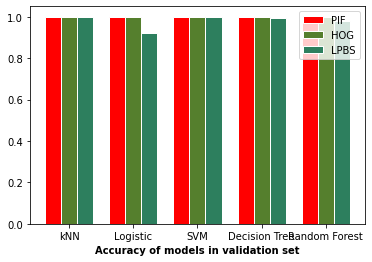

In [52]:
#@title
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
PIF = [score[0][0][1], score[1][0][1], score[2][0][1], score[3][0][1], score[4][0][1]]
HOG = [score[0][1][1], score[1][1][1], score[2][1][1], score[3][1][1], score[4][1][1]]
LPBS = [score[0][2][1], score[1][2][1], score[2][2][1], score[3][2][1], score[4][2][1]]

print(PIF)
print(HOG)
print(LPBS)

# Set position of bar on X axis
r1 = np.arange(len(PIF))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, PIF, color='#FF0000', width=barWidth, edgecolor='white', label='PIF')
plt.bar(r2, HOG, color='#557f2d', width=barWidth, edgecolor='white', label='HOG')
plt.bar(r3, LPBS, color='#2d7f5e', width=barWidth, edgecolor='white', label='LPBS')
 
# Add xticks on the middle of the group bars
plt.xlabel('Accuracy of models in validation set', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PIF))], ['kNN', 'Logistic', 'SVM', 'Decision Tree', 'Random Forest'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

*Do cắt frame ảnh từ video, các ảnh trong tập dữ liệu khá giống nhau nên kết quả độ chính xác của các model trên tập validation set rất cao.*

# **5. ĐÁNH GIÁ KẾT QUẢ, KẾT LUẬN**

## Đánh giá model trên tập test

Biểu đồ bên dưới cho thấy độ hiệu quả trên tập dữ liệu test của 5 model với 3 phương pháp rút trích đặt trưng 

[0.7466666666666667, 0.76, 0.2, 0.12666666666666668, 0.31666666666666665]
[0.34, 0.4166666666666667, 0.22333333333333333, 0.15, 0.28]
[0.2966666666666667, 0.25333333333333335, 0.23, 0.29, 0.3933333333333333]


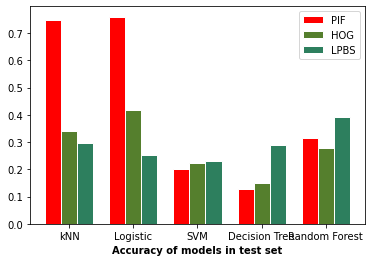

In [51]:
#@title
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
PIF = [score[0][0][2], score[1][0][2], score[2][0][2], score[3][0][2], score[4][0][2]]
HOG = [score[0][1][2], score[1][1][2], score[2][1][2], score[3][1][2], score[4][1][2]]
LPBS = [score[0][2][2], score[1][2][2], score[2][2][2], score[3][2][2], score[4][2][2]]

print(PIF)
print(HOG)
print(LPBS)

# Set position of bar on X axis
r1 = np.arange(len(PIF))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, PIF, color='#FF0000', width=barWidth, edgecolor='white', label='PIF')
plt.bar(r2, HOG, color='#557f2d', width=barWidth, edgecolor='white', label='HOG')
plt.bar(r3, LPBS, color='#2d7f5e', width=barWidth, edgecolor='white', label='LPBS')
 
# Add xticks on the middle of the group bars
plt.xlabel('Accuracy of models in test set', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PIF))], ['kNN', 'Logistic', 'SVM', 'Decision Tree', 'Random Forest'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


## Demo



> Model Logistic với phương pháp rút trích đặc trưng Pixel Is Feature cho kết quả cao nhất nên tôi sẽ dùng model này để thực hiện demo.



Load Model

In [3]:
#@title
import pickle
demo_model = pickle.load(open('extract_model/logistic_model_pif.sav', 'rb'))

Hiện ảnh và dự đoán kết quả

Pepsi


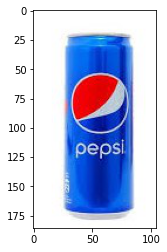

In [28]:
#@title
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('testIMG/pepsi.jpg')
imgplot = plt.imshow(img)

className = ['Cocacola', 'Pepsi', 'Redbull', 'Teaplus', 'Twister']
TEST_PATH = 'testIMG'
sp = SimplePreprocessor(36, 64)
sdl = SimpleDatasetLoader(preprocessors=[sp])
TestImagePaths = list(paths.list_images(TEST_PATH))
test_data, a  = sdl.load(TestImagePaths, verbose=500)
test_data = test_data.reshape((test_data.shape[0], 6912))
x = demo_model.predict(test_data)
for i in range(len(x)):
  print(className[x[i]])

## Đánh giá



> Nhận xét về các thuật toán cùng các phương pháp rút trích đặc trưng

*   Tổng quan: Phương pháp rút trích đặc trưng Pixel Is Feature cho kết quả cao nhất trong hầu hết các thuật toán. Thuật toán Logistic và kNN cho kết quả cao nhất trong các thuật toán.
*   Với phương pháp rút trích đặc trưng Pixel Is Feature, các thuật toán Logistic và kNN cho kết quả độ chính xác lần lượt là 76% và 75% trên tập test

*   Phương pháp rút trích đặc trưng Histogram Of Oriented Gradients và Local Binary Patterns cho kết quả xấp xỉ bằng nhau. Tuy nhiên, độ chính xác của chúng trên 5 thuật toán đều thấp (dưới 50%) nên không thể ứng dụng được, cần được cải thiện thêm.
*   2 model có khả năng ứng dụng được là kNN (Pixel Is Feature) và Logistic (Pixel Is Feature) nhưng với tỉ lệ 76% là một tỉ lệ tương đối, không cao lắm nên nếu muốn áp dụng cho mục đích thương mại cần độ chính xác cao như đếm, phân loại... thì cần phải cải thiện thêm.
*   Có thể việc cắt frame ảnh từ video không làm đa dạng được bộ dữ liệu nên model có thể bị overfiting nhẹ, cần phải thu thập thêm dữ liệu


> Các hướng cải thiện, phát triển thêm trong tương lai:

*   Thu thập thêm data để cải thiện độ chính xác của các model
*   Dùng test set để turning model, thi thập thêm dataset
*   Xây dựng thêm model deeplearning để đánh giá, so sánh độ chính xác
*   Phát triển thành API hoặc xây dựng thành ứng dụng có thể dùng trên smartphone hoặc các phần cứng khác dùng trong thương mại.
*   Xây dựng thêm model nhận dạng vật thể để cắt khung ảnh chứa vật thể rồi dùng khung ảnh đó làm input của model này để phân loại sản phẩm, có thể cho độ chính xác cao hơn.


